<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-27 13:29:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.4’

survey-data.csv.4   100%[===================>] 152.13M  59.6MB/s    in 2.6s    

2025-01-27 13:29:34 (59.6 MB/s) - ‘survey-data.csv.4’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 184.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 178.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 153.1 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [10]:
!pip install seaborn

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [40]:
Query='''select * from main'''
df=pd.read_sql_query(Query,conn)

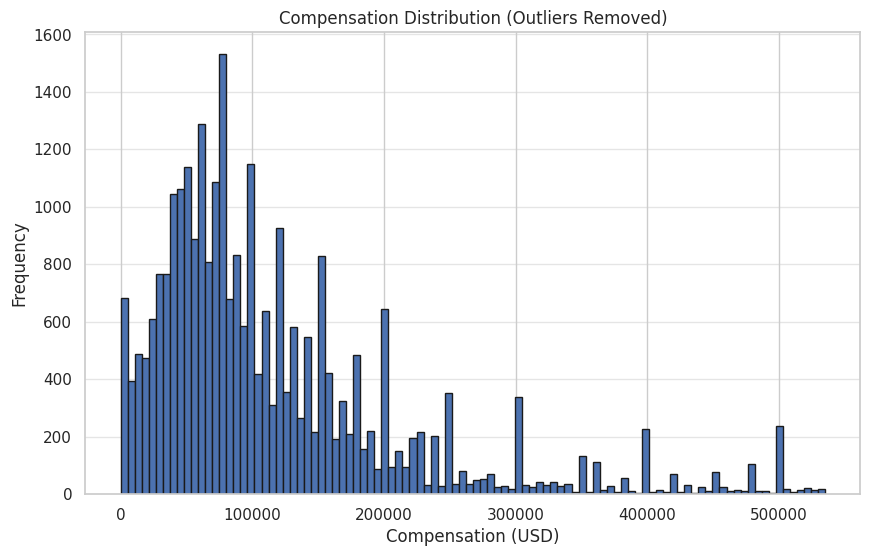

In [41]:
## Write your code here
# Define the query
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Execute the query
df_comptotal = pd.read_sql_query(QUERY, conn)

# Convert to numeric and drop NaN values
df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')
df_comptotal = df_comptotal.dropna()

# Calculate IQR
Q1 = df_comptotal['CompTotal'].quantile(0.25)
Q3 = df_comptotal['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Set bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df_comptotal = df_comptotal[(df_comptotal['CompTotal'] >= lower_bound) & 
                                     (df_comptotal['CompTotal'] <= upper_bound)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_comptotal['CompTotal'], bins=100, edgecolor='k')
plt.title('Compensation Distribution (Outliers Removed)')
plt.xlabel('Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()


**Box Plots**

Plot a box plot of Age.


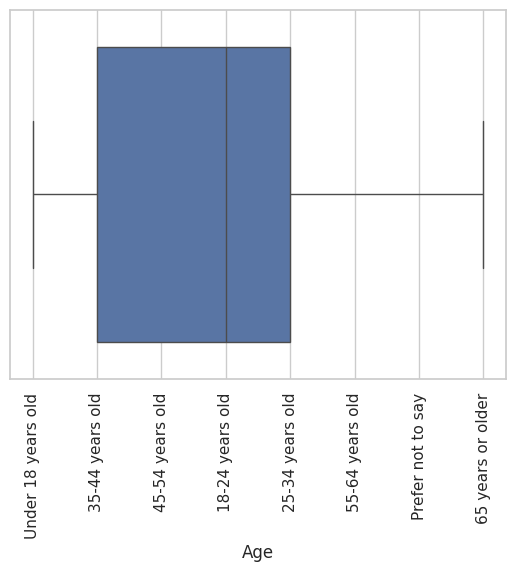

In [42]:
## Write your code here
sns.boxplot(data=df,x='Age')
plt.xticks(rotation=90)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


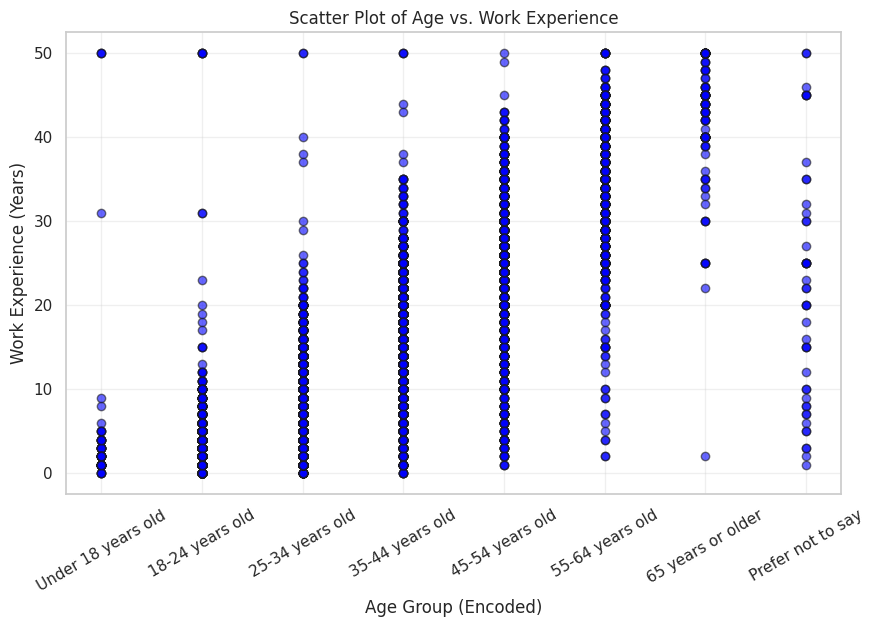

In [46]:
## Write your code here
# SQL Query to get Age and WorkExp
QUERY = """
SELECT Age, WorkExp
FROM main
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""

df_age_workexp = pd.read_sql_query(QUERY, conn)
# Map Age to Numerical Values (Ordinal Encoding)
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': 8
}

df_age_workexp['AgeNum'] = df_age_workexp['Age'].map(age_mapping)
  
# Plotting the Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_age_workexp['AgeNum'], df_age_workexp['WorkExp'], alpha=0.6, color='blue', edgecolor='k')

plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age Group (Encoded)')
plt.ylabel('Work Experience (Years)')
plt.xticks(ticks=list(age_mapping.values()), labels=age_mapping.keys(), rotation=30)
   
plt.grid(True, alpha=0.3)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


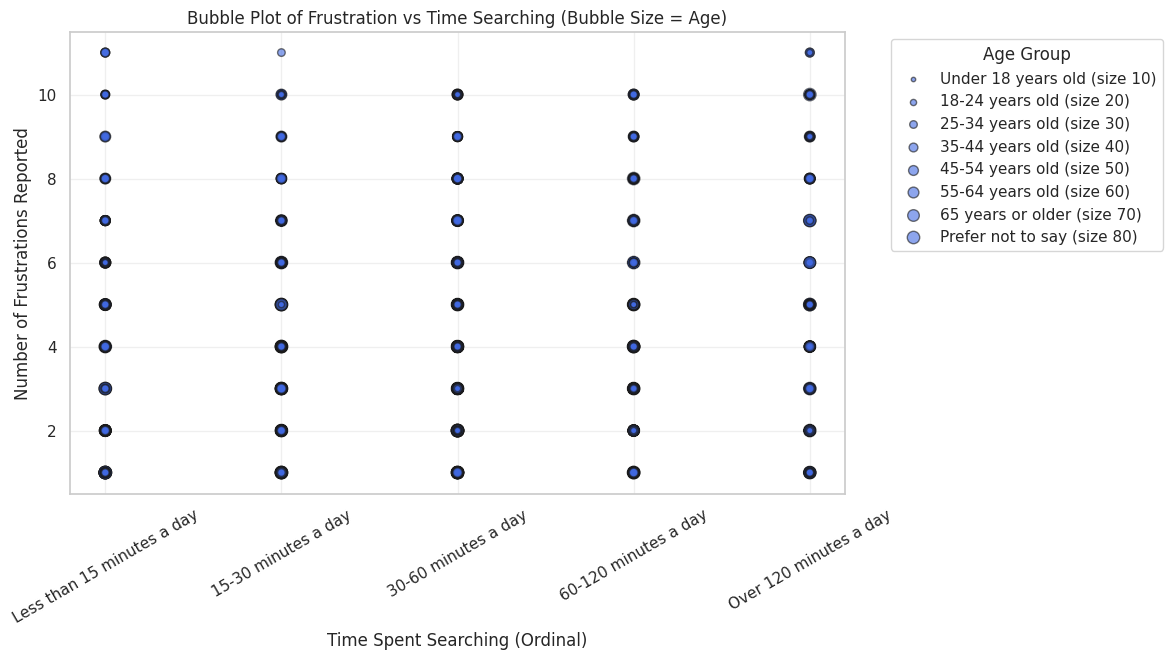

In [47]:
# SQL Query to get TimeSearching, Frustration, and Age
QUERY = """
SELECT Age, TimeSearching, Frustration
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL
"""
df_atf = pd.read_sql_query(QUERY, conn)

# Map Age to Numerical Values (Bubble Size)
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': 80
}
df_atf['AgeSize'] = df_atf['Age'].map(age_mapping)

# Map TimeSearching to Ordinal Values
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}
df_atf['TimeSearchingNum'] = df_atf['TimeSearching'].map(time_mapping)

# Process Frustration Column (Count Number of Frustrations Selected)
df_atf['FrustrationCount'] = df_atf['Frustration'].apply(lambda x: len(x.split(';')))

# Plotting the Bubble Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_atf['TimeSearchingNum'], df_atf['FrustrationCount'], s=df_atf['AgeSize'],
                      alpha=0.6, color='royalblue', edgecolor='k')

plt.title('Bubble Plot of Frustration vs Time Searching (Bubble Size = Age)')
plt.xlabel('Time Spent Searching (Ordinal)')
plt.ylabel('Number of Frustrations Reported')
plt.xticks(ticks=list(time_mapping.values()), labels=time_mapping.keys(), rotation=30)

plt.grid(True, alpha=0.3)

# Create Legend for Bubble Sizes
legend_labels = [f"{k} (size {v})" for k, v in age_mapping.items()]
for size, label in zip(age_mapping.values(), legend_labels):
    plt.scatter([], [], s=size, label=label, color='royalblue', alpha=0.6, edgecolor='k')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


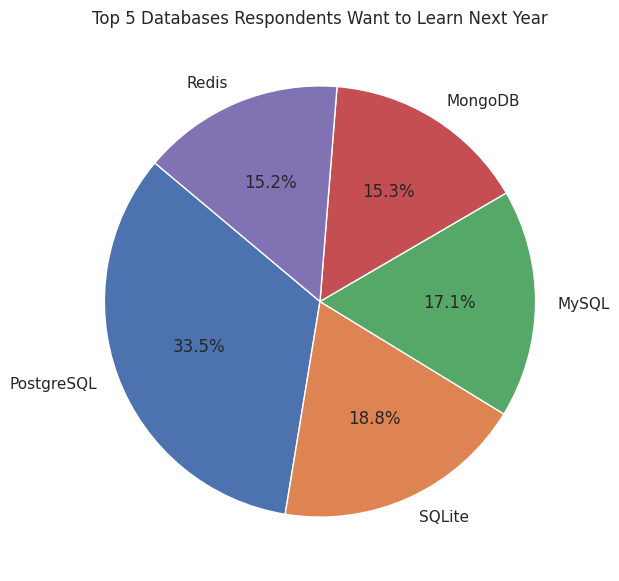

In [51]:
# Importing necessary libraries
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# SQL Query to get DatabaseWantToWorkWith
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""

# Connection to database connection
df_databases = pd.read_sql_query(QUERY, conn)

# Splitting the database names and counting their occurrences
database_list = ';'.join(df_databases['DatabaseWantToWorkWith']).split(';')
database_counts = Counter(database_list)

# Get the Top 5 Databases
top_5 = database_counts.most_common(5)
top_5_names = [db[0] for db in top_5]
top_5_counts = [db[1] for db in top_5]

# Plotting the Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(top_5_counts, labels=top_5_names, autopct='%1.1f%%', startangle=140)

plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


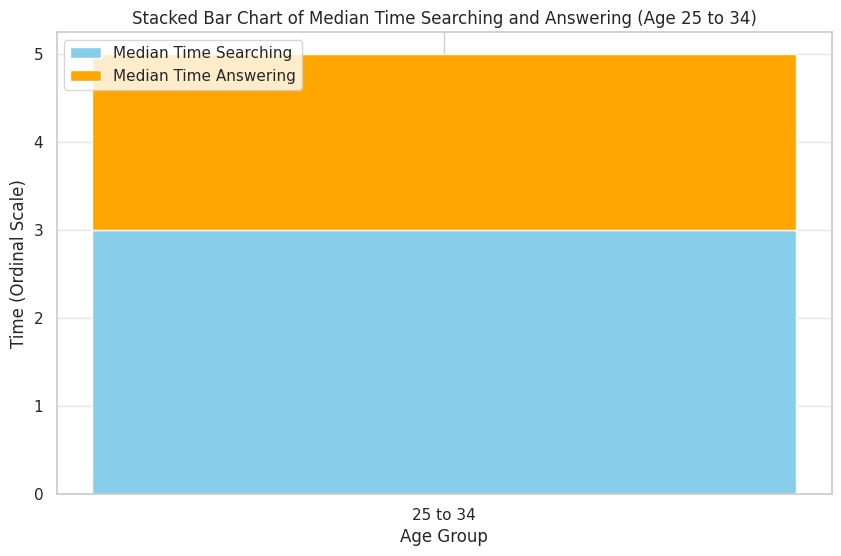

In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Write your code here
conn = sqlite3.connect('survey-data.sqlite')

# SQL Query to get Age, TimeSearching, and TimeAnswering
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IS NOT NULL 
AND TimeSearching IS NOT NULL 
AND TimeAnswering IS NOT NULL
"""

df_search_answer = pd.read_sql_query(QUERY, conn)

# Filter for the age group '25-34 years old' based on database categories
df_search_answer = df_search_answer[df_search_answer['Age'] == '25-34 years old']  # Adjust based on your database age brackets

# Map TimeSearching and TimeAnswering to Ordinal Values
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}
df_search_answer['TimeSearchingNum'] = df_search_answer['TimeSearching'].map(time_mapping)
df_search_answer['TimeAnsweringNum'] = df_search_answer['TimeAnswering'].map(time_mapping)

# Calculate Median for TimeSearching and TimeAnswering
median_time_searching = df_search_answer['TimeSearchingNum'].median()
median_time_answering = df_search_answer['TimeAnsweringNum'].median()

# Plotting the Stacked Bar Chart
plt.figure(figsize=(10, 6))
plt.bar('25 to 34', median_time_searching, color='skyblue', label='Median Time Searching')
plt.bar('25 to 34', median_time_answering, bottom=median_time_searching, color='orange', label='Median Time Answering')

plt.title('Stacked Bar Chart of Median Time Searching and Answering (Age 25 to 34)')
plt.ylabel('Time (Ordinal Scale)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.5)

plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


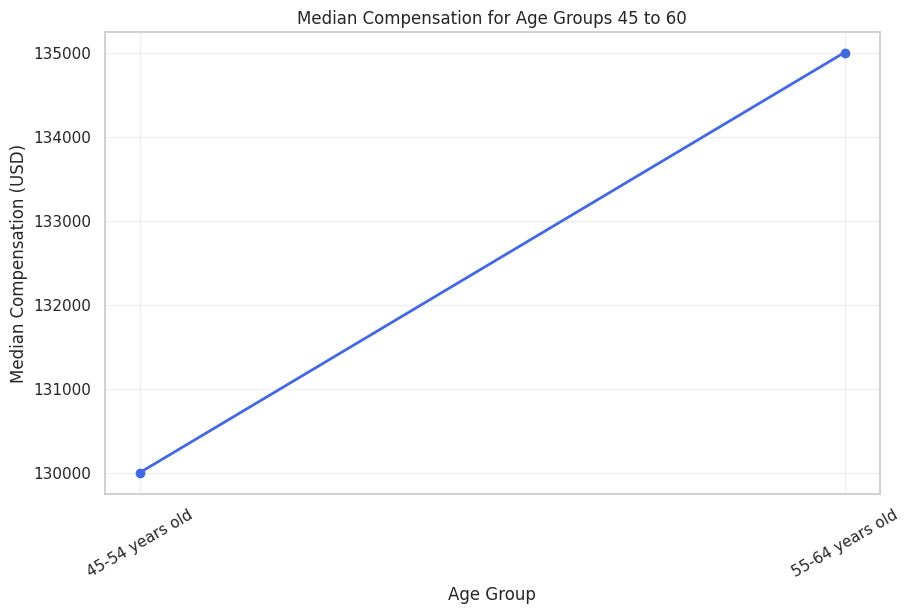

In [53]:
## Write your code here

# SQL Query
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

# Read SQL query into DataFrame
df_age_comp = pd.read_sql_query(QUERY, conn)

# Map Age to Numerical Values (for filtering age range 45-60)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

df_age_comp['AgeNum'] = df_age_comp['Age'].map(age_mapping)

# Filter for Ages between 45 and 60
df_filtered = df_age_comp[(df_age_comp['AgeNum'] >= 45) & (df_age_comp['AgeNum'] <= 60)]

# Calculate Median Compensation by Age Group
median_comp = df_filtered.groupby('Age')['CompTotal'].median().reset_index()

# Plotting the Line Chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp['Age'], median_comp['CompTotal'], marker='o', color='royalblue', linewidth=2)

plt.title('Median Compensation for Age Groups 45 to 60')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)

plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


NameError: name 'Time' is not defined

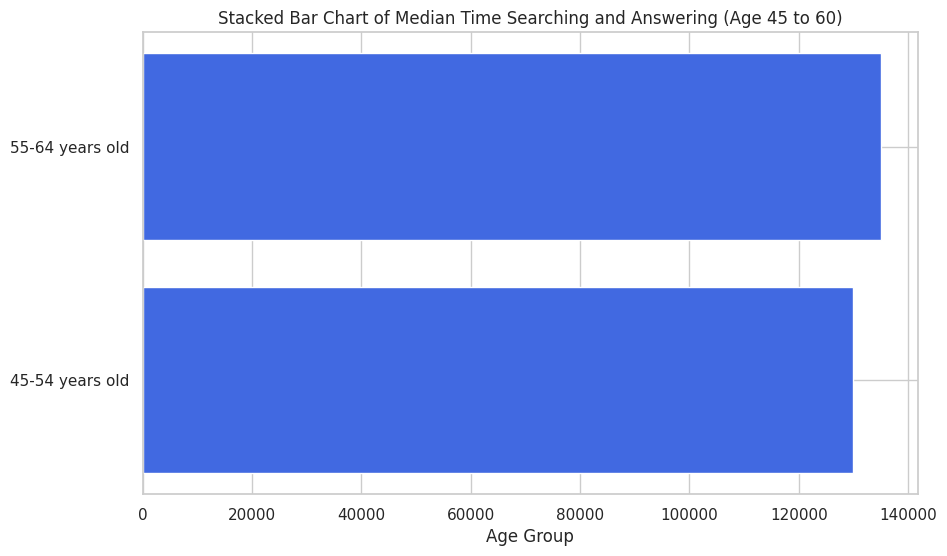

In [59]:
## Write your code here

# SQL Query
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""

# Read SQL query into DataFrame
df_age_comp = pd.read_sql_query(QUERY, conn)

# Map Age to Numerical Values (for filtering age range 45-60)
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 65
}

df_age_comp['AgeNum'] = df_age_comp['Age'].map(age_mapping)

# Filter for Ages between 45 and 60
df_filtered = df_age_comp[(df_age_comp['AgeNum'] >= 45) & (df_age_comp['AgeNum'] <= 60)]

# Calculate Median Compensation by Age Group
median_comp = df_filtered.groupby('Age')['CompTotal'].median().reset_index()

# Plotting the Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(median_comp['Age'], median_comp['CompTotal'], color='royalblue')

plt.title('Stacked Bar Chart of Median Time Searching and Answering (Age 45 to 60)')
plt.xlabel('Age Group')
plt.ylabel(Time ('Ordinal Scale'))
plt.grid(True, axis='x', alpha=0.3)

plt.show()


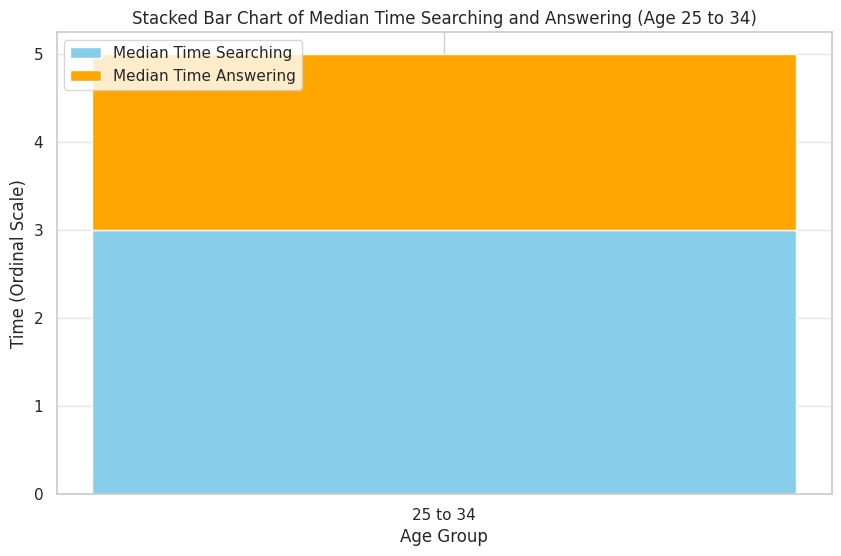

In [55]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# SQL Query to get Age, TimeSearching, and TimeAnswering
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IS NOT NULL
AND TimeSearching IS NOT NULL
AND TimeAnswering IS NOT NULL
"""

# Read the query into a DataFrame
df_search_answer = pd.read_sql_query(QUERY, conn)

# Filter for the age group '25-34 years old' based on database categories
df_search_answer = df_search_answer[df_search_answer['Age'] == '25-34 years old']  # Adjust based on your database age brackets

# Map TimeSearching and TimeAnswering to Ordinal Values
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}
df_search_answer['TimeSearchingNum'] = df_search_answer['TimeSearching'].map(time_mapping)
df_search_answer['TimeAnsweringNum'] = df_search_answer['TimeAnswering'].map(time_mapping)

# Calculate Median for TimeSearching and TimeAnswering
median_time_searching = df_search_answer['TimeSearchingNum'].median()
median_time_answering = df_search_answer['TimeAnsweringNum'].median()

# Plotting the Stacked Bar Chart
plt.figure(figsize=(10, 6))
plt.bar('25 to 34', median_time_searching, color='skyblue', label='Median Time Searching')
plt.bar('25 to 34', median_time_answering, bottom=median_time_searching, color='orange', label='Median Time Answering')

plt.title('Stacked Bar Chart of Median Time Searching and Answering (Age 25 to 34)')
plt.ylabel('Time (Ordinal Scale)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', alpha=0.5)

plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
